In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mat73 import loadmat
def normalize(img):
    """
    Normalize the image to [0, 1] range.
    """
    img -= np.min(img)
    img /= np.max(img)
    return img
mat_file = 'E:/pulseq/20241104_ABDL/syn/gres6e_1p0.mat'
imgs = loadmat(mat_file)["gre_imgs"]

img = imgs[5]
img = normalize(img) * 255
img = img.astype(np.uint8)

(-0.5, 199.5, 199.5, -0.5)

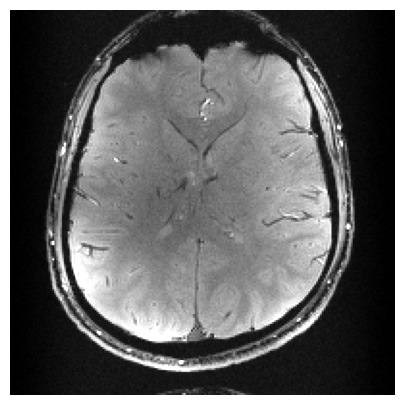

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img, cmap='gray', vmin=np.quantile(img, 0.01), vmax=np.quantile(img, 0.99))
ax.axis('off')

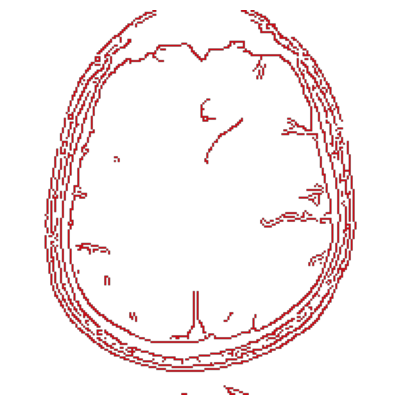

In [123]:
img_opencv_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# detect edges using Canny edge detection
edges = cv2.Canny(img_opencv_bgr, 50, 150, apertureSize=3, L2gradient=True)
edge = (edges > 1).astype(int)
edge = np.array([edge*200, edge*10, edge*20, edge*255]).transpose(1, 2, 0)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(edge, cmap='gray')
ax.axis('off')

fig.savefig('E:/pulseq/20241104_ABDL/syn/gres6e_1p0_edge.png', dpi=600, bbox_inches='tight', pad_inches=0, transparent=True)


In [ ]:
# 将 NumPy 矩阵 转换为 OpenCV格式
img = np.random.randint(0, 256, size=(500, 500), dtype=np.uint8)
img_opencv = img.copy()

# 转换后，OpenCV格式的图像需要使用 BGR 格式
img_opencv_bgr = cv2.cvtColor(img_opencv, cv2.COLOR_GRAY2BGR)

# detected contours
contours, _ = cv2.findContours(img_opencv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# loop through each contour
for i, contour in enumerate(contours):
    # draw a bounding rectangle around the contour
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img_opencv_bgr, (x, y), (x+w, y+h), (0, 255, 0), 2)

# show the output
cv2.imshow('Contours', img_opencv_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save the output to a file
cv2.imwrite('output.jpg', img_opencv_bgr)

# detect edges using Canny edge detection
edges = cv2.Canny(img_opencv, 50, 150)

# show the output
cv2.imshow('Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save the output to a file
cv2.imwrite('edges.jpg', edges)